In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carregar a base de dados Iris
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, header=None)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Codificar a variável alvo (species) para números
df['species'] = df['species'].astype('category').cat.codes

# Dividir as features e o alvo
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Normalização dos dados
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Dividir o conjunto de dados em treino e teste
np.random.seed(42)
indices = np.random.permutation(X.shape[0])
train_size = int(0.8 * X.shape[0])
train_idx, test_idx = indices[:train_size], indices[train_size:]
X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]


Epoch 1/100 - Loss: 2.8430 - Accuracy: 0.2250
Epoch 2/100 - Loss: 2.3715 - Accuracy: 0.2417
Epoch 3/100 - Loss: 1.9906 - Accuracy: 0.2500
Epoch 4/100 - Loss: 1.6868 - Accuracy: 0.2583
Epoch 5/100 - Loss: 1.4457 - Accuracy: 0.2583
Epoch 6/100 - Loss: 1.2623 - Accuracy: 0.3250
Epoch 7/100 - Loss: 1.1310 - Accuracy: 0.4250
Epoch 8/100 - Loss: 1.0239 - Accuracy: 0.5167
Epoch 9/100 - Loss: 0.9467 - Accuracy: 0.5750
Epoch 10/100 - Loss: 0.8941 - Accuracy: 0.6000
Epoch 11/100 - Loss: 0.8521 - Accuracy: 0.6333
Epoch 12/100 - Loss: 0.8187 - Accuracy: 0.6333
Epoch 13/100 - Loss: 0.7890 - Accuracy: 0.6417
Epoch 14/100 - Loss: 0.7639 - Accuracy: 0.6583
Epoch 15/100 - Loss: 0.7421 - Accuracy: 0.6667
Epoch 16/100 - Loss: 0.7222 - Accuracy: 0.6833
Epoch 17/100 - Loss: 0.7040 - Accuracy: 0.6917
Epoch 18/100 - Loss: 0.6877 - Accuracy: 0.6917
Epoch 19/100 - Loss: 0.6724 - Accuracy: 0.6917
Epoch 20/100 - Loss: 0.6581 - Accuracy: 0.6917
Epoch 21/100 - Loss: 0.6448 - Accuracy: 0.6917
Epoch 22/100 - Loss: 0

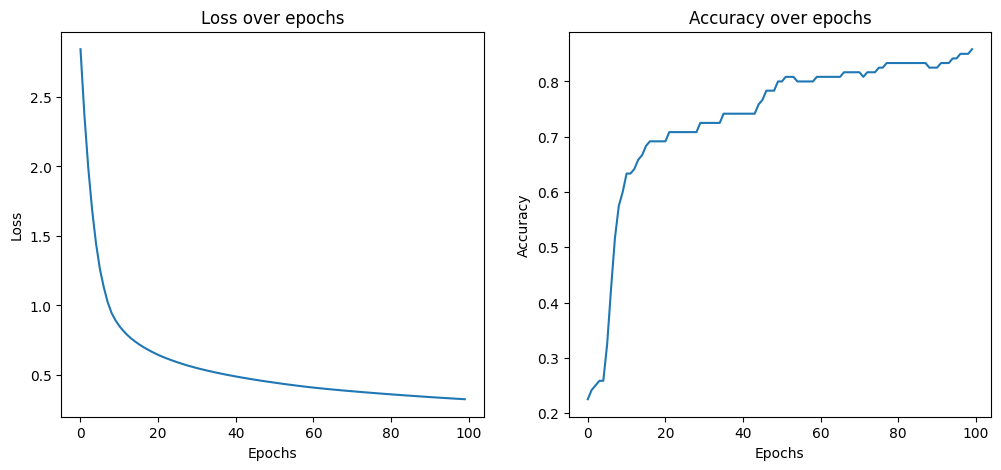

In [ ]:
class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.learning_rate = learning_rate
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Inicializar pesos e bias
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / exp_z.sum(axis=1, keepdims=True)

    def relu(self, z):
        return np.maximum(0, z)

    def relu_derivative(self, z):
        return z > 0

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.relu(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.softmax(self.z2)
        return self.a2

    def compute_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        log_likelihood = -np.log(y_pred[range(m), y_true])
        loss = np.sum(log_likelihood) / m
        return loss

    def backward(self, X, y_true, y_pred):
        m = y_true.shape[0]

        # Gradiente da saída
        delta2 = y_pred
        delta2[range(m), y_true] -= 1
        delta2 /= m

        # Gradientes para W2 e b2
        dW2 = np.dot(self.a1.T, delta2)
        db2 = np.sum(delta2, axis=0, keepdims=True)

        # Gradientes para a camada oculta
        delta1 = np.dot(delta2, self.W2.T) * self.relu_derivative(self.z1)

        # Gradientes para W1 e b1
        dW1 = np.dot(X.T, delta1)
        db1 = np.sum(delta1, axis=0)

        # Atualizar pesos e bias
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2

    def train(self, X, y, epochs=100, batch_size=32):
        history = {'loss': [], 'accuracy': []}

        for epoch in range(epochs):
            # Embaralhar os dados
            indices = np.random.permutation(X.shape[0])
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for i in range(0, X.shape[0], batch_size):
                X_batch = X_shuffled[i:i+batch_size]
                y_batch = y_shuffled[i:i+batch_size]

                y_pred = self.forward(X_batch)
                loss = self.compute_loss(y_batch, y_pred)

                self.backward(X_batch, y_batch, y_pred)

            # Cálculo de perda e acurácia após cada época
            y_train_pred = np.argmax(self.forward(X), axis=1)
            train_loss = self.compute_loss(y, self.forward(X))
            train_accuracy = np.mean(y_train_pred == y)

            history['loss'].append(train_loss)
            history['accuracy'].append(train_accuracy)

            print(f'Epoch {epoch+1}/{epochs} - Loss: {train_loss:.4f} - Accuracy: {train_accuracy:.4f}')

        return history

# Inicializar e treinar o modelo
mlp = MLP(input_size=X_train.shape[1], hidden_size=5, output_size=3, learning_rate=0.01)
history = mlp.train(X_train, y_train, epochs=100, batch_size=16)

# Visualizar as curvas de custo e acurácia
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history['loss'])
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(history['accuracy'])
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()


Epoch 1/100 - Loss: 1.1443 - Accuracy: 0.3021
Epoch 2/100 - Loss: 1.0947 - Accuracy: 0.3021
Epoch 3/100 - Loss: 1.0691 - Accuracy: 0.3333
Epoch 4/100 - Loss: 1.0529 - Accuracy: 0.3542
Epoch 5/100 - Loss: 1.0390 - Accuracy: 0.3542
Epoch 6/100 - Loss: 1.0258 - Accuracy: 0.3646
Epoch 7/100 - Loss: 1.0142 - Accuracy: 0.3854
Epoch 8/100 - Loss: 1.0031 - Accuracy: 0.4271
Epoch 9/100 - Loss: 0.9921 - Accuracy: 0.4375
Epoch 10/100 - Loss: 0.9805 - Accuracy: 0.5208
Epoch 11/100 - Loss: 0.9693 - Accuracy: 0.5625
Epoch 12/100 - Loss: 0.9578 - Accuracy: 0.5729
Epoch 13/100 - Loss: 0.9455 - Accuracy: 0.6146
Epoch 14/100 - Loss: 0.9340 - Accuracy: 0.6146
Epoch 15/100 - Loss: 0.9226 - Accuracy: 0.6250
Epoch 16/100 - Loss: 0.9119 - Accuracy: 0.6354
Epoch 17/100 - Loss: 0.9023 - Accuracy: 0.7396
Epoch 18/100 - Loss: 0.8935 - Accuracy: 0.7396
Epoch 19/100 - Loss: 0.8853 - Accuracy: 0.7396
Epoch 20/100 - Loss: 0.8773 - Accuracy: 0.7188
Epoch 21/100 - Loss: 0.8690 - Accuracy: 0.7188
Epoch 22/100 - Loss: 0

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Epoch 57/100 - Loss: 0.7050 - Accuracy: 0.7083
Epoch 58/100 - Loss: 0.7030 - Accuracy: 0.7083
Epoch 59/100 - Loss: 0.7011 - Accuracy: 0.7083
Epoch 60/100 - Loss: 0.6992 - Accuracy: 0.7083
Epoch 61/100 - Loss: 0.6973 - Accuracy: 0.7083
Epoch 62/100 - Loss: 0.6954 - Accuracy: 0.7083
Epoch 63/100 - Loss: 0.6936 - Accuracy: 0.7083
Epoch 64/100 - Loss: 0.6917 - Accuracy: 0.7083
Epoch 65/100 - Loss: 0.6898 - Accuracy: 0.7083
Epoch 66/100 - Loss: 0.6880 - Accuracy: 0.7083
Epoch 67/100 - Loss: 0.6862 - Accuracy: 0.7083
Epoch 68/100 - Loss: 0.6843 - Accuracy: 0.7083
Epoch 69/100 - Loss: 0.6825 - Accuracy: 0.7083
Epoch 70/100 - Loss: 0.6807 - Accuracy: 0.7083
Epoch 71/100 - Loss: 0.6790 - Accuracy: 0.7083
Epoch 72/100 - Loss: 0.6772 - Accuracy: 0.7083
Epoch 73/100 - Loss: 0.6754 - Accuracy: 0.7083
Epoch 74/100 - Loss: 0.6737 - Accuracy: 0.7083
Epoch 75/100 - Loss: 0.6720 - Accuracy: 0.7083
Epoch 76/100 - Loss: 0.6702 - Accuracy: 0.7083
Epoch 77/100 - Loss: 0.6685 - Accuracy: 0.7083
Epoch 78/100 

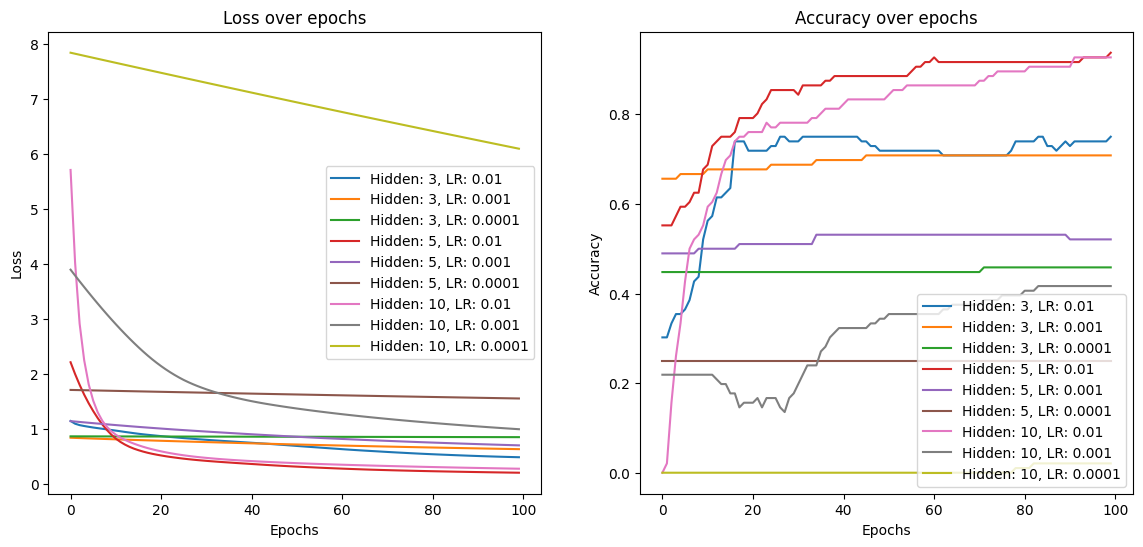

In [ ]:

# Dividindo o conjunto de treino em treino e validação
val_size = int(0.2 * X_train.shape[0])
X_train_split, X_val = X_train[:train_size-val_size], X_train[train_size-val_size:]
y_train_split, y_val = y_train[:train_size-val_size], y_train[train_size-val_size:]

# Parâmetros a serem testados
hidden_sizes = [3, 5, 10]
learning_rates = [0.01, 0.001, 0.0001]

best_accuracy = 0
best_params = {}
all_histories = {}

for hidden_size in hidden_sizes:
    for lr in learning_rates:
        # Inicializando e treinando o modelo
        mlp = MLP(input_size=X_train.shape[1], hidden_size=hidden_size, output_size=3, learning_rate=lr)
        history = mlp.train(X_train_split, y_train_split, epochs=100, batch_size=16)

        # Avaliação no conjunto de validação
        y_val_pred = np.argmax(mlp.forward(X_val), axis=1)
        val_accuracy = np.mean(y_val_pred == y_val)

        print(f'Hidden Size: {hidden_size}, Learning Rate: {lr}, Validation Accuracy: {val_accuracy:.4f}')

        # Guardar os históricos para plotagem
        all_histories[(hidden_size, lr)] = history

        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_params = {'hidden_size': hidden_size, 'learning_rate': lr}

print(f'Melhores Parâmetros: {best_params}, Melhor Acurácia de Validação: {best_accuracy:.4f}')

# Plotar os resultados de perda e acurácia para cada combinação de hiperparâmetros
plt.figure(figsize=(14, 6))

for (hidden_size, lr), history in all_histories.items():
    plt.subplot(1, 2, 1)
    plt.plot(history['loss'], label=f'Hidden: {hidden_size}, LR: {lr}')
    plt.title('Loss over epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

    plt.subplot(1, 2, 2)
    plt.plot(history['accuracy'], label=f'Hidden: {hidden_size}, LR: {lr}')
    plt.title('Accuracy over epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')

plt.subplot(1, 2, 1)
plt.legend()
plt.subplot(1, 2, 2)
plt.legend()
plt.show()



In [ ]:
# Treinando o modelo final com os melhores hiperparâmetros
mlp_best = MLP(input_size=X_train.shape[1], hidden_size=best_params['hidden_size'], output_size=3, learning_rate=best_params['learning_rate'])
history_best = mlp_best.train(X_train, y_train, epochs=100, batch_size=16)

# Avaliação no conjunto de teste
y_test_pred = np.argmax(mlp_best.forward(X_test), axis=1)
test_accuracy = np.mean(y_test_pred == y_test)

print(f'Acurácia no conjunto de teste: {test_accuracy:.4f}')


Epoch 1/100 - Loss: 2.0472 - Accuracy: 0.4375
Epoch 2/100 - Loss: 1.8087 - Accuracy: 0.4688
Epoch 3/100 - Loss: 1.6129 - Accuracy: 0.4792
Epoch 4/100 - Loss: 1.4503 - Accuracy: 0.4792
Epoch 5/100 - Loss: 1.3110 - Accuracy: 0.4896
Epoch 6/100 - Loss: 1.1947 - Accuracy: 0.4896
Epoch 7/100 - Loss: 1.0958 - Accuracy: 0.5208
Epoch 8/100 - Loss: 1.0119 - Accuracy: 0.5208
Epoch 9/100 - Loss: 0.9387 - Accuracy: 0.5625
Epoch 10/100 - Loss: 0.8745 - Accuracy: 0.5833
Epoch 11/100 - Loss: 0.8192 - Accuracy: 0.5938
Epoch 12/100 - Loss: 0.7713 - Accuracy: 0.6250
Epoch 13/100 - Loss: 0.7294 - Accuracy: 0.6562
Epoch 14/100 - Loss: 0.6924 - Accuracy: 0.6667
Epoch 15/100 - Loss: 0.6599 - Accuracy: 0.7083
Epoch 16/100 - Loss: 0.6319 - Accuracy: 0.7083
Epoch 17/100 - Loss: 0.6067 - Accuracy: 0.7188
Epoch 18/100 - Loss: 0.5841 - Accuracy: 0.7292
Epoch 19/100 - Loss: 0.5638 - Accuracy: 0.7396
Epoch 20/100 - Loss: 0.5457 - Accuracy: 0.7604
Epoch 21/100 - Loss: 0.5293 - Accuracy: 0.7812
Epoch 22/100 - Loss: 0

In [ ]:
# Carregar o conjunto de dados
data = np.loadtxt('/content/artificial_dataset.txt')

# Separar as features e o alvo
X_artificial = data[:, :-1]
y_artificial = data[:, -1].astype(int)

# Dividir em treinamento, validação e teste
train_size = int(0.6 * X_artificial.shape[0])
val_size = int(0.2 * X_artificial.shape[0])
test_size = X


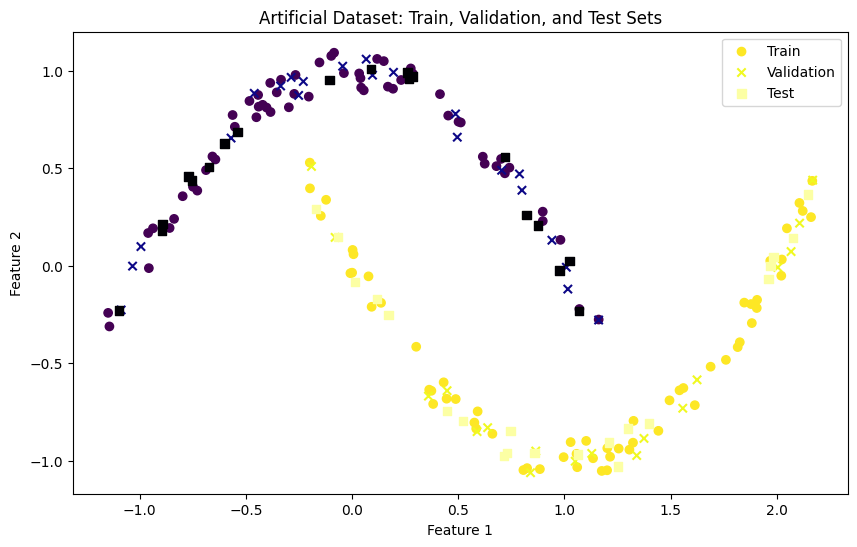

In [ ]:

# Separar as features e o alvo
X_artificial = data[:, :-1]
y_artificial = data[:, -1].astype(int)

# Dividir em treinamento, validação e teste
train_size = int(0.6 * X_artificial.shape[0])
val_size = int(0.2 * X_artificial.shape[0])
test_size = X_artificial.shape[0] - train_size - val_size

# Embaralhar os índices
indices = np.random.permutation(X_artificial.shape[0])
train_idx = indices[:train_size]
val_idx = indices[train_size:train_size+val_size]
test_idx = indices[train_size+val_size:]

# Criar os conjuntos de dados
X_train_art, X_val_art, X_test_art = X_artificial[train_idx], X_artificial[val_idx], X_artificial[test_idx]
y_train_art, y_val_art, y_test_art = y_artificial[train_idx], y_artificial[val_idx], y_artificial[test_idx]

# Plotar as duas primeiras features
plt.figure(figsize=(10, 6))
plt.scatter(X_train_art[:, 0], X_train_art[:, 1], c=y_train_art, marker='o', label='Train', cmap='viridis')
plt.scatter(X_val_art[:, 0], X_val_art[:, 1], c=y_val_art, marker='x', label='Validation', cmap='plasma')
plt.scatter(X_test_art[:, 0], X_test_art[:, 1], c=y_test_art, marker='s', label='Test', cmap='inferno')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Artificial Dataset: Train, Validation, and Test Sets')
plt.show()